In [27]:
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from os import system
import getpass
import os
import re
from bs4 import BeautifulSoup as bs
import itertools

In [28]:
system('say -v Alex Enter your username and password')
username = input('Enter the username:')
print('Enter the password:')
password = getpass.getpass()


Enter the username:innovative_coder
Enter the password:
········


In [30]:
#system('say -v Alex Hey Innovative Coder')

browser = webdriver.Chrome("/opt/local/var/macports/sources/rsync.macports.org/macports/release/tarballs/ports/www/chromedriver")
browser.maximize_window()
#system('say -v Alex Automation Started')
#system('say -v Alex Opening Instagram')
browser.get('https://www.instagram.com')
sleep(2)

#locate login button and click login button on signup page
browser.find_element_by_xpath('//article/div/div/p/a[text()="Log in"]').click()
#system('say -v Alex Logging into your account')
element = browser.find_element_by_xpath("//input[@name='username']")
element.send_keys(username)
browser.find_element_by_xpath("//input[@name='password']").send_keys(password)

browser.find_element_by_xpath('//form/span/button[text()="Log in"]').click()
sleep(4)

#Search a hashtag
#browser.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]').send_keys('#')
#browser.find_element_by_xpath("//input[@placeholder='Search']").send_keys('#programmer')
sleep(2)
#like all the pics on that page
def like_all(browser):
    #system('say -v Alex Liking all the content on feed')
    l=0
    while l!= 50:
        for like_link in browser.find_elements_by_link_text('Like'):
            sleep(1)
            like_link.click()
        sleep(2)
        l = l+1

#like_all(browser)

def follow_from_page(browser):
    url = 'https://www.instagram.com/coding.engineer/'
    browser.get(url)
    browser.find_element_by_xpath("//a[(contains(.,'following'))]").click()
    for like_link in browser.find_elements_by_link_text('Follow'):
        like_link.click()
        
follow_from_page(browser)

def xpath_soup(element):
    """
    Generate xpath of soup element
    :param element: bs4 text or node
    :return: xpath as string
    """
    components = []
    child = element if element.name else element.parent
    for parent in child.parents:
        """
        @type parent: bs4.element.Tag
        """
        previous = itertools.islice(parent.children, 0, parent.contents.index(child))
        xpath_tag = child.name
        xpath_index = sum(1 for i in previous if i.name == xpath_tag) + 1
        components.append(xpath_tag if xpath_index == 1 else '%s[%d]' % (xpath_tag, xpath_index))
        child = parent
    components.reverse()
    return '/%s' % '/'.join(components)

source = browser.page_source
soup = bs(source, 'html.parser')
button = soup.find('button', text=re.compile(r'Follow'))
xpath_for_the_button = xpath_soup(button)

elm = browser.find_element_by_xpath(xpath_for_the_button)
elm.click()
def like_pic_hashtag(browser):
    #system('say -v Alex Searching the hashtag')
    browser.get('https://www.instagram.com/explore/tags/coding/')
    #system.('say Liking all the pics from hashtag')
    browser.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[1]/div/div[1]/div[1]').click()
    while True:
        for like_link in browser.find_elements_by_link_text('Like'):
            like_link.click()
        break
    while True:
        for like_link in browser.find_elements_by_link_text('" likes"'):
            like_link.click()
        break 
#like_pic_hashtag(browser)
#browser.find_element_by_xpath('/html/body/div[3]/div/div[2]/div/article/div[2]/section[2]/div/a').click()
#sleep(10)
#browser.close()


WebDriverException: Message: unknown error: Element <button class="_qv64e _t78yp _r9b8f _njrw0">...</button> is not clickable at point (738, 155). Other element would receive the click: <li class="_6e4x5 _l0pt6 _fk40f">...</li>
  (Session info: chrome=63.0.3239.132)
  (Driver info: chromedriver=2.35.528157 (4429ca2590d6988c0745c24c8858745aaaec01ef),platform=Mac OS X 10.13.2 x86_64)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en" class="no-js lt-ie9 lt-ie8 lt-ie7 logged-in client-root"> <![endif]--><!--[if IE 7]>         <html lang="en" class="no-js lt-ie9 lt-ie8 logged-in client-root"> <![endif]--><!--[if IE 8]>         <html lang="en" class="no-js lt-ie9 logged-in client-root"> <![endif]--><!--[if gt IE 8]><!--><html class="js logged-in client-root" lang="en" xmlns="http://www.w3.org/1999/xhtml"><!--<![endif]--><head><meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>Coding engineer (@coding.engineer) • Instagram photos and videos</title>
<meta content="noimageindex, noarchive" name="robots"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="#000000" name="theme-color"/>
<meta content="width=device-width, user-scalable=no, initial-scale=1, minimum-scale=1, maximum-scale=1" id="viewport" name="viewport"/>
<link href="/data/manifest.json" rel="manifest"/>
<link crossorigin="" href="https://graph.instagram
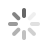
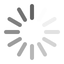
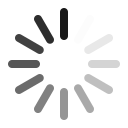

In [33]:
soup

In [37]:
button = soup.find('button', text=re.compile(r'Follow'))
button

<button class="_qv64e _t78yp _r9b8f _njrw0">Following</button>